In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

# 경로 설정
chat_dir = '/content/gdrive/MyDrive/AI service/pytest/data/'

Mounted at /content/gdrive


In [3]:
print(chat_dir)

/content/gdrive/MyDrive/AI service/pytest/data/


# 1. 형태소 분석

In [4]:
# 형태소분석기 관련 설치
!apt-get update
!apt-get install g++ openjdk-8-jdk

!pip install JPype1
!pip install rhinoMorph

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [696 B]
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Hit:9 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:10 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [73.9 kB]
Get:11 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:12 http://ppa.launchpad.net/cran/

In [5]:
# 데이터 읽기 함수 정의
def read_data(filename, encoding='cp949'):
  with open(filename, 'r', encoding=encoding) as f:
    data = [line.split('\t') for line in f.read().splitlines()]
  return data

In [6]:
# 형태소 분석 준비
import rhinoMorph
rn = rhinoMorph.startRhino() # 형태소분석기 기동

data = read_data(chat_dir+'data.txt', encoding='cp949')
rn = rhinoMorph.startRhino()

print('자료 타입:', type(data)) # 리스트
print('전체 문장수:', len(data)) # 6322개 문장
print('형태소 분석 전 모습:', data[:20]) # 본문과 라벨로 구성

filepath:  /usr/local/lib/python3.7/dist-packages
classpath:  /usr/local/lib/python3.7/dist-packages/rhinoMorph/lib/rhino.jar
RHINO started!
filepath:  /usr/local/lib/python3.7/dist-packages
classpath:  /usr/local/lib/python3.7/dist-packages/rhinoMorph/lib/rhino.jar
JVM is already started~
RHINO started!
자료 타입: <class 'list'>
전체 문장수: 6322
형태소 분석 전 모습: [['저희 안경원 코드 번호 확인이 가능할까요?', '매장코드'], ['저희 안경원 코드를 잊어버렸습니다', '매장코드'], ['안경원 코드번호 확인이 어렵습니다 어떻게 해야하나요?', '매장코드'], ['매장 코드번호 확인이 어렵습니다 어떻게 해야하나요?', '매장코드'], ['안경원 코드번호 확인하는 방법이 있을까요?', '매장코드'], ['안경원 코드번호 조회부탁드립니다', '매장코드'], ['저희 안경원 코드 확인부탁드려요', '매장코드'], ['안경원 코드 번호를 잊어버렸어요 확인부탁드려요', '매장코드'], ['안경원 코드 번호 확인을 어디에서 확인 할 수 있나요?', '매장코드'], ['저희 안경원 코드 어떻게 확인 할 수 있나요?', '매장코드'], ['저희 매장 코드 번호 확인하고싶어요', '매장코드'], ['매장 코드 번호 어디에서 볼 수 있나요?', '매장코드'], ['매장 코드 번호 확인하고싶어요 어디에서 볼 수 있나요?', '매장코드'], ['매장 코드 번호 조회는 어디에서 할 수 있나요?', '매장코드'], ['매장 코드 번호 어떻게 알 수 있나요?', '매장코드'], ['매장 번호 확인하고싶어요 어디에서 볼 수 있나요?', '매장코드'], ['코드번호 까먹었습니다', '매장코드'], ['코드번호 잊어버렸습니다',

In [7]:
# 형태소 분석
with open(chat_dir+'data_morphed.txt', 'w', encoding='utf-8') as f:
  for data_each in data:
    morphed_data_each = rhinoMorph.onlyMorph_list(rn, data_each[0], pos=['NNG','NNP', 'NP', 'VV', 'VA', 'VX', 'XR', 'IC', 'MM', 'MAG']) # 실질형태소만 가져오기
    print("morphed_data_each:", morphed_data_each)
    joined_data_each = ' '.join(morphed_data_each) # 분리된 형태소를 하나로 연결 (공백 조인으로 영어처럼 만들기)
    if joined_data_each:
      f.write(joined_data_each + '\t' + data_each[1] + '\n')
    print('Morphological Analysis Completed.')

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
morphed_data_each: ['반품', '신청', '내역', '어디', '확인', '하']
Morphological Analysis Completed.
morphed_data_each: ['반품', '신청', '내역', '어디', '확인', '하']
Morphological Analysis Completed.
morphed_data_each: ['반품', '신청', '내역', '어디', '확인', '하']
Morphological Analysis Completed.
morphed_data_each: ['반품', '신청', '내역', '어디', '확인', '하']
Morphological Analysis Completed.
morphed_data_each: ['반품', '내역', '조회', '어떻하', '확인']
Morphological Analysis Completed.
morphed_data_each: ['반품', '내역', '조회', '어떻하', '확인']
Morphological Analysis Completed.
morphed_data_each: ['반품', '내역', '조회', '어떻하', '확인']
Morphological Analysis Completed.
morphed_data_each: ['반품', '내역', '조회', '어떻하', '확인']
Morphological Analysis Completed.
morphed_data_each: ['반품', '내역', '조회', '어떻하', '확인', '하']
Morphological Analysis Completed.
morphed_data_each: ['반품', '내역', '조회', '어떻하', '확인', '하']
Morphological Analysis Completed.
morphed_data_each: ['반품', '내역', '조회', '어떻하', '확인', '하']
Morphological Analysis Completed

In [10]:
print("연결된 마지막 문장 :", joined_data_each)
print("마지막 문장의 라벨 :", data_each[1]) # 라벨은 총 10개로 구성

연결된 마지막 문장 : 제품 배송비 없 주문 금액 얼마
마지막 문장의 라벨 : 배송비


In [11]:
# 데이터 쓰기 함수 정의
def write_data_list(list, filename, encoding):
  """리스트 변수를 위한 쓰기 함수"""
  with open(chat_dir+filename, 'w') as f:
    for item in list:
      f.write('%s\t%s\n' % (item[0], item[1]))

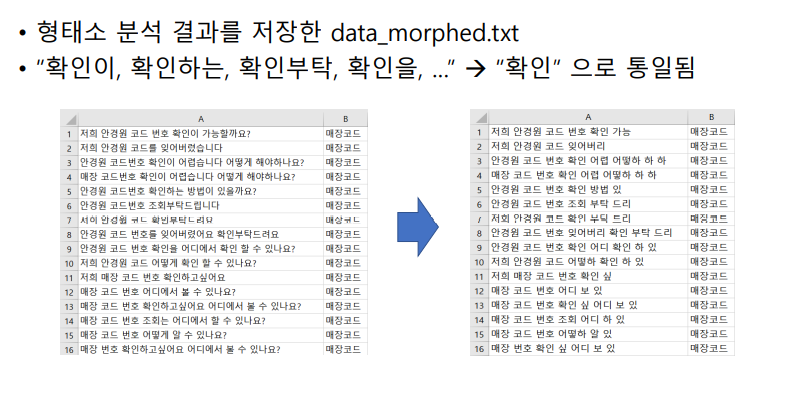

# 2. 훈련데이터와 테스트데이터 분리

In [86]:
# 훈련데이터와 테스트데이터 분리
from sklearn.model_selection import train_test_split
data = read_data(chat_dir+'data_morphed.txt', encoding='utf-8')
train, test = train_test_split(data, test_size=0.2) # 여기서는 TS를 validation data 로 사용한다.

write_data_list(list=train, filename='train_data_morphed.txt', encoding='utf-8')
write_data_list(list=test, filename='test_data_morphed.txt', encoding='utf-8')

In [87]:
# 훈련데이터 읽기
data = read_data(chat_dir+'train_data_morphed.txt', encoding='utf-8')
print('train length:', len(data)) # 5057

texts = [line[0] for line in data] # 훈련데이터 본문
labels = [line[1] for line in data] # 훈련데이터 레이블 부분

train length: 5057


In [88]:
# 테스트 데이터 읽기
data_val = read_data(chat_dir+'test_data_morphed.txt', encoding='utf-8')
print('test length:', len(data_val)) # 1265

texts_val = [line[0] for line in data_val] # 테스트 데이터 본문
labels_val = [line[1] for line in data_val] # 테스트 데이터 label 부분

test length: 1265


# 3. 데이터 변환

In [89]:
# Tokenizing
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np
import math

max_words = 1000 # 데이터셋에서 가장 빈도 높은 n개의 단어만 사용한다
maxlen = 20 # 각 문장의 길이를 고정시킨다.

tokenizer = Tokenizer(num_words=max_words) # 상위빈도 1,000 개의 단어만을 추려내는 Tokenizer 객체 생성
tokenizer.fit_on_texts(texts) # 단어 인덱스를 구축한다
word_index = tokenizer.word_index # 단어 인덱스만 가져온다

print('전체에서 %s개의 고유한 토큰을 찾았습니다.' % len(word_index))
print('word_index type: ', type(word_index))
print('word_index: ',word_index)


전체에서 218개의 고유한 토큰을 찾았습니다.
word_index type:  <class 'dict'>
word_index:  {'하': 1, '확인': 2, '어떻하': 3, '있': 4, '제품': 5, '반품': 6, '어디': 7, '교환': 8, '가능': 9, '주': 10, '달': 11, '조회': 12, '이번': 13, '수': 14, '배송': 15, '주문': 16, '영업': 17, '샘플': 18, '되': 19, '내역': 20, '알리': 21, '신청': 22, '언제': 23, '싶': 24, '번호': 25, '개봉': 26, '마감일': 27, '회수': 28, '도착': 29, '당일': 30, '알': 31, '담당': 32, '상품': 33, '금액': 34, '코드': 35, '시간': 36, '받': 37, '드리': 38, '부탁': 39, '궁금': 40, '배송비': 41, '연락처': 42, '대상': 43, '저희': 44, '사원': 45, '지': 46, '일정': 47, '얼마': 48, '정하': 49, '매장': 50, '방법': 51, '방문': 52, '보': 53, '안경원': 54, '여부': 55, '개수': 56, '수량': 57, '한가': 58, '갯수': 59, '없이': 60, '품목': 61, '요청': 62, '담당자': 63, '환불': 64, '자': 65, '청구': 66, '이상': 67, '능': 68, '소비자': 69, '한': 70, '수령': 71, '서': 72, '날짜': 73, '청구서': 74, '전화': 75, '공급가': 76, '법': 77, '대금': 78, '얼마나': 79, '통화': 80, '문의': 81, '않': 82, '서해': 83, '동일': 84, '이력': 85, '는지': 86, '없': 87, '같': 88, '확': 89, '저번': 90, '바꾸': 91, '안': 92, '고': 93, '지궁': 94, '그룹': 95

토큰으로 선정된 각 단어에 대하여 index가 배당된다

Tokenizing으로 1) Token을 구하고 2) 빈도 기준으로 Sequencing을 한다


In [90]:
# Tokenizing 결과 확인
data = tokenizer.texts_to_sequences(texts)
print("data:", data)

len_d = [len(d) for d in data]
print("최대 문장 길이: ", max(len_d))
print("최소 문장 길이: ", min(len_d))

data: [[5, 14, 114, 21, 10], [13, 11, 6, 27, 2, 3, 1, 40], [78, 74, 121, 39, 38], [13, 11, 18, 56, 7, 2, 1], [5, 8, 140, 3, 22, 14, 4], [26, 19, 33, 8, 9, 58], [6, 28, 47, 31, 24], [41, 60, 16, 24, 48, 67, 16], [64, 34, 7, 2], [8, 22, 1, 28, 47, 40], [17, 32, 25, 2, 3, 1, 19, 31, 10], [8, 20, 12, 77, 21, 10, 4], [13, 11, 18, 57, 2, 39, 38], [5, 14, 114, 154, 89, 1, 10, 141], [6, 20, 12, 7, 83], [26, 5, 8, 24, 7, 1, 4], [5, 15, 12, 1, 14, 4, 51, 4], [44, 50, 18, 37, 93, 24, 7, 22, 4], [13, 11, 18, 59, 7, 2, 1], [16, 23, 37, 4, 3, 2, 1], [26, 5, 6, 4], [8, 28, 23, 19], [17, 32, 42, 2, 3, 1], [6, 20, 12, 3, 2], [6, 20, 12, 3, 2], [41, 60, 16, 24, 3, 1, 1], [26, 1, 5, 6, 9, 55, 2, 39, 38], [13, 11, 18, 59, 7, 2, 1], [6, 34, 3, 2, 14, 4], [17, 63, 42, 2, 3, 1, 19, 31, 10], [8, 20, 12, 3, 1], [17, 45, 75, 3, 1], [6, 9, 33, 3, 2, 14, 94], [17, 45, 42, 3, 31, 14, 4], [6, 43, 61, 49, 46, 4], [30, 15, 5, 29, 36, 31, 14, 4], [17, 32, 25, 2, 3, 1, 19], [88, 95, 5, 3, 2, 14, 4], [5, 15, 12, 1, 51, 

In [91]:
# 데이터 padding
data = pad_sequences(data, maxlen=maxlen)

data_val = tokenizer.texts_to_sequences(texts_val) #test data의 토크나이징과 패딩
data_val = pad_sequences(data_val, maxlen=maxlen)

print('data type:', type(data))
print('data length:', len(data))
print('texts 0:', texts[0])
print('data 0:', data[0])

data type: <class 'numpy.ndarray'>
data length: 5057
texts 0: 제품 수 령 알리 주
data 0: [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   5  14 114
  21  10]


In [92]:
# one-hot encoding
# one-hot encoding은 모든 숫자를 0과 1로만 만든다
# 숫자로 치환된 라벨이 다중분류에서 올바른 곳에 표시될 수 있게 한다
sample = [[5, 6, 7], [8, 9, 10]]
arr = np.zeros((len(sample), 10+1)) # “10”은 11번째에 들어가게 되므로 11개의 공간을 만든다 (패딩 0 고려)

for i, seq in enumerate(sample): # 리스트가 2개이므로 i는 총 2회(0, 1) 반복되며,
  arr[i, seq] = 1. # 각 i에서 리스트의 number가 가리키는 곳에 1을 기록한다
arr

array([[0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.]])

In [93]:
# 원-핫 인코딩 함수
def to_one_hot(sequences, dimension):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

In [94]:
# 데이터 원-핫 인코딩
data = to_one_hot(data, dimension=max_words)
data_val = to_one_hot(data_val, dimension=max_words)

print('data type:', type(data))
print('data length:', len(data))
print('texts 0:', texts[0])
print('data 0:', data[0])

data type: <class 'numpy.ndarray'>
data length: 5057
texts 0: 제품 수 령 알리 주
data 0: [1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [95]:
# 문자열 label을 숫자로 치환
def labelToIint(labels):
  for count, label in enumerate(labels):
    if label == "배송비":
      labels[count] = 0
    elif label == "담당자문의":
      labels[count] = 1
    elif label == "제품가격":
      labels[count] = 2
    elif label == "배송문의":
      labels[count] = 3
    elif label == "매장코드":
      labels[count] = 4
    elif label == "샘플문의":
      labels[count] = 5
    elif label == "반품문의":
      labels[count] = 6
    elif label == "제품불일치":
      labels[count] = 7
    elif label == "교환문의":
      labels[count] = 8
    elif label == "청구금액":
      labels[count] = 9
  return labels

In [96]:
# 훈련데이터와 테스트데이터의 label을 숫자로 치환
print("훈련데이터 label 치환 전:\n", labels)
labels = labelToIint(labels)
print("치환 후:", labels)

print("\n테스트데이터 label 치환 전:\n", labels_val)
labels_val = labelToIint(labels_val)
print("치환 후:", labels_val)

훈련데이터 label 치환 전:
 ['배송문의', '반품문의', '청구금액', '샘플문의', '교환문의', '교환문의', '반품문의', '배송비', '반품문의', '교환문의', '담당자문의', '교환문의', '샘플문의', '배송문의', '반품문의', '교환문의', '배송문의', '샘플문의', '샘플문의', '배송문의', '반품문의', '교환문의', '담당자문의', '반품문의', '반품문의', '배송비', '반품문의', '샘플문의', '반품문의', '담당자문의', '교환문의', '담당자문의', '반품문의', '담당자문의', '반품문의', '배송문의', '담당자문의', '교환문의', '배송문의', '샘플문의', '배송문의', '교환문의', '교환문의', '담당자문의', '담당자문의', '반품문의', '반품문의', '반품문의', '교환문의', '반품문의', '교환문의', '교환문의', '담당자문의', '반품문의', '교환문의', '교환문의', '매장코드', '반품문의', '반품문의', '배송문의', '교환문의', '반품문의', '반품문의', '교환문의', '담당자문의', '청구금액', '교환문의', '배송문의', '반품문의', '교환문의', '매장코드', '배송문의', '교환문의', '담당자문의', '교환문의', '배송비', '반품문의', '반품문의', '배송문의', '교환문의', '배송문의', '매장코드', '담당자문의', '교환문의', '교환문의', '배송문의', '반품문의', '제품가격', '교환문의', '반품문의', '배송문의', '담당자문의', '반품문의', '교환문의', '배송문의', '반품문의', '샘플문의', '배송문의', '반품문의', '반품문의', '배송문의', '교환문의', '반품문의', '담당자문의', '교환문의', '샘플문의', '매장코드', '반품문의', '담당자문의', '교환문의', '배송문의', '배송문의', '반품문의', '교환문의', '반품문의', '담당자문의', '제품가격', '배송비', '샘플문의', '배송문의', '교환문의', 

In [97]:
# label의 원-핫 인코딩
class_number = 10 # 분류할 클래스의 수

labels = to_one_hot(labels, dimension=class_number)
print(labels)

labels_val = to_one_hot(labels_val, dimension=class_number)
print(labels_val)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [99]:
# Train과 Test 데이터 준비
# Train 데이터와 Test 데이터 준비
print('데이터 텐서의 크기:', data.shape) # (5057, 1000)
print('레이블 텐서의 크기:', labels.shape) # (5057, 10)

x_train = data
y_train = labels
x_val = data_val # 여기서는 test data를 validation 데이터로도 사용한다
y_val = labels_val 

데이터 텐서의 크기: (5057, 1000)
레이블 텐서의 크기: (5057, 10)


# 4. 모델 구성

In [101]:
# 하이퍼파라미터 설정
epochs = 5 # 수행할 에포크의 수
batch_size = 32 # 한 번에 훈련할 배치 사이즈
model_name = 'train_data_morphed.h5' # 저장될 모델의 이름
tokenizer_name = 'train_data_morphed.pickle' # 저장될 토크나이저의 이름

In [103]:
# 모델 설계
# Define Model
from keras.models import Sequential
from keras.layers import Dense, Embedding, Flatten

model = Sequential() # 모델을 새로 정의

model.add(Dense(64, activation='relu', input_shape=(max_words,))) # 첫 번째 은닉층
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=class_number, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                64064     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 66,474
Trainable params: 66,474
Non-trainable params: 0
_________________________________________________________________


In [106]:
# Compile Model
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

# 32개씩 미니 배치를 만들어 n번의 epoch로 훈련. 배치 개수는 보통 8~512개 중에서 선택
# 훈련 데이터로 훈련하고, 검증 데이터로 검증한다
# 반환값의 history는 훈련하는 동안 발생한 모든 정보를 담고 있는 딕셔너리이다
history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_val, y_val), verbose=1)
history_dict = history.history

Epoch 1/5
159/159 [==============================] - 5s 13ms/step - loss: 0.8238 - acc: 0.8183 - val_loss: 0.1365 - val_acc: 0.9810
Epoch 2/5
159/159 [==============================] - 1s 6ms/step - loss: 0.0445 - acc: 0.9945 - val_loss: 0.0145 - val_acc: 0.9984
Epoch 3/5
159/159 [==============================] - 1s 6ms/step - loss: 0.0040 - acc: 0.9998 - val_loss: 0.0021 - val_acc: 1.0000
Epoch 4/5
159/159 [==============================] - 1s 5ms/step - loss: 5.5966e-04 - acc: 1.0000 - val_loss: 5.0108e-04 - val_acc: 1.0000
Epoch 5/5
159/159 [==============================] - 1s 6ms/step - loss: 8.9183e-05 - acc: 1.0000 - val_loss: 2.5345e-04 - val_acc: 1.0000


In [109]:
# 모델 저장
# 만들어진 모델을 이후에 재사용할 수 있도록 저장한다
import pickle

model.save(model_name)

# 같은 단어를 추출하기 위해 훈련데이터에서 사용된 상위빈도 10,000개의 단어로 된 Tokenizer 저장
with open(tokenizer_name, 'wb') as file:
  pickle.dump(tokenizer, file, protocol=pickle.HIGHEST_PROTOCOL) # pickle 프로토콜 최신 버전 사용

# 5. 모델 성능 확인

In [111]:
# Accuracy & Loss
# history 딕셔너리 안에 있는 정확도와 손실값을 가져와 본다
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

print('Validation accuracy of each epoch:', np.round(val_acc, 3))
epochs = range(1, len(val_acc) + 1)

Validation accuracy of each epoch: [0.981 0.998 1.    1.    1.   ]


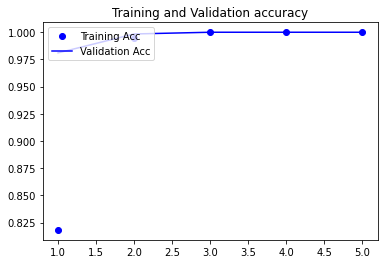

In [112]:
# 성능 평가 (plotting performance)
# Accuracy
import matplotlib.pyplot as plt

plt.plot(epochs, acc, 'bo', label='Training Acc')
plt.plot(epochs, val_acc, 'b', label='Validation Acc')
plt.title('Training and Validation accuracy')

plt.legend(loc=2)

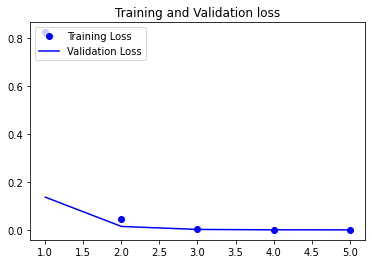

In [113]:
# Loss
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation loss')
plt.legend(loc=2)
plt.show()

In [114]:
# load model(저장된 모델을 불러와 사용한다)
from tensorflow.keras.models import load_model

loaded_model = load_model(model_name)

with open(tokenizer_name, 'rb') as handle:
  loaded_tokenizer = pickle.load(handle)

In [115]:
# 숫자형 라벨을 답변으로 치환
def intToLabel(label_int):
  labels = ''
  if label_int == 0:
    labels = '20,000원 이상 주문하시면 배송비가 없습니다'
  elif label_int == 1:
    labels = '담당자는 홈페이지에 사번을 넣으시면 자세한 정보를 알 수 있습니다'
  elif label_int == 2:
    labels = '공급가와 소비자가는 홈페이지 > … > 가격조회 에서 확인 가능합니다'
  elif label_int == 3:
    labels = '배송은 2~3일 정도 소요됩니다'
  elif label_int == 4:
    labels = '매장코드는 n번 입니다'
  elif label_int == 5:
    labels = '샘플은 n 상품입니다.'
  elif label_int == 6:
    labels = '반품은 02-111-1111로 문의 부탁드립니다'
  elif label_int == 7:
    labels = '제품은 홈페이지와 상이할 수 있습니다'
  elif label_int == 8:
    labels = '교환은 일주일 내로 가능합니다'
  elif label_int == 9:
    labels = '청구금액은 매달 12일 이후에 홈페이지 > … > 청구금액에서 확인 가능합니다'
  return labels

In [117]:
# 1문장 치환
user_input = input("내용을 입력하세요: ")
morphed_input, poses = rhinoMorph.wholeResult_list(rn, user_input, pos=['NNG', 'NNP', 'NP', 'VV', 'VA', 'XR', 'VCN', 'MAG', 'MAJ', 'IC', 'JKV', 'EF', 'SF'])
text = [morphed_input]

data = loaded_tokenizer.texts_to_sequences(text)
data = pad_sequences(data, maxlen=maxlen)
x_test = to_one_hot(data, dimension=max_words)

predictions = loaded_model.predict(x_test)
label_int = np.argmax(predictions)
label = intToLabel(label_int)
print(label)

내용을 입력하세요: 교환하고 싶어요
교환은 일주일 내로 가능합니다
